### Train Set와 Test Set의 필요성
- 모든 문제와 답을 알려주고 해당 범위내에서 점수를 내면 항상 100점이 나온다.    
- 하나의 DataSet을 Train(훈련)부분과 Test(검증)으로 분리한다. 
- Train Set은 학습하고 학습내용은 Test Set으로 검증을 하여야 모델의 정확성을 신뢰할 수 있다. 

In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Train Set와 Test Set로 분리하기

In [3]:
# Train Set
train_input = fruits.loc[:34,['length', 'weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [4]:
train_target = fruits.loc[:34,'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [5]:
# Train Set의 갯수 확인하기
len(train_input) == len(train_target)

True

---
### Test Set

In [6]:
test_input = fruits.loc[35:, ['length', 'weight']]
test_input.head()

,length,weight
35,9.8,6.7
36,10.5,7.5
37,10.6,7.0
38,11.0,9.7
39,11.2,9.8


In [7]:
test_target = fruits.loc[35:, 'name']
test_target.head()

35    berry
36    berry
37    berry
38    berry
39    berry
Name: name, dtype: object

In [8]:
# 갯수 확인
len(test_input) == len(test_target)

True

---
### kNN을 이용한 분류

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Model
kn = KNeighborsClassifier() 

In [11]:
# 학습 시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [12]:
# 평가하기
kn.score(test_input, test_target)

0.0

In [13]:
kn.score(train_input, train_target)

1.0

> 샘플링 편향(bias)이 발생 하였다. 

### Numpy를 이용하여 샘플링 편향을 제거하기

In [14]:
import numpy as np

In [18]:
np.random.seed(42) # random sample을 하나로 정의하여 다른 모델에서 동일한 값으로 테스트 
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [19]:
# Train으로 사용될 index 번호
index[:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [21]:
# train data 구성하기
train_input = fruits.loc[index[:35],['length', 'weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [22]:
train_target = fruits.loc[index[:35],['name']]
train_target.head()

,name
13,apple
45,berry
47,berry
44,berry
17,apple


In [24]:
# Test로 사용할 번호
index[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [23]:
# test data 구성하시
test_input = fruits.loc[index[35:],['length', 'weight']]
test_input.head()

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0


In [25]:
test_target = fruits.loc[index[35:],['name']]
test_target.head()

,name
37,berry
35,berry
23,apple
39,berry
10,apple


### Data의 분포를 산포도로 확인하기

In [26]:
import matplotlib.pyplot as plt

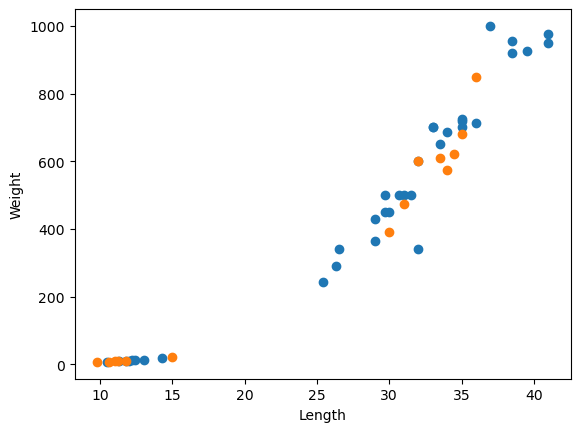

In [27]:
plt.scatter(
    train_input.length,
    train_input.weight
)

plt.scatter(
    test_input.length,
    test_input.weight
)

plt.xlabel("Length")
plt.ylabel("Weight")

plt.show()

In [28]:
# 학습하기
kn.fit(train_input, train_target)

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
# 검증하기
print(f"Train : {kn.score(train_input, train_target)}")
print(f"Test  : {kn.score(test_input, test_target)}")

Train : 1.0
Test  : 1.0


In [33]:
# 빈도수 확인
import collections

In [34]:
# 모집단의 성격
collections.Counter(fruits.loc[:,'name'])

Counter({'apple': 35, 'berry': 14})

In [35]:
35/ 14

2.5

In [38]:
# train target의 빈도수
collections.Counter(train_target.loc[:,'name'])

Counter({'apple': 27, 'berry': 8})

In [39]:
27 / 8

3.375

In [40]:
# test target의 빈도수
collections.Counter(test_target.loc[:,'name'])

Counter({'apple': 8, 'berry': 6})

In [41]:
8/6

1.3333333333333333

---
### sklearn으로 Train Set와 Test Set 나누기

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Feature와 Target 분리
fruits_data = fruits.loc[:,['length','weight']]
fruits_data.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [44]:
fruits_target = fruits.loc[:,'name']
fruits_target.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

In [45]:
train_input, test_input, train_target, test_target =  \
                    train_test_split(
                        fruits_data,
                        fruits_target,
                        random_state=42 # random을 일정하게 
                    )

In [46]:
# 크기 확인 
print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [47]:
print(test_input.shape, test_target.shape)

(13, 2) (13,)


In [48]:
collections.Counter(fruits.name)

Counter({'apple': 35, 'berry': 14})

In [49]:
35 / 14

2.5

In [50]:
collections.Counter(train_target)

Counter({'apple': 25, 'berry': 11})

In [51]:
25 / 11

2.272727272727273

In [52]:
collections.Counter(test_target)

Counter({'apple': 10, 'berry': 3})

In [53]:
10/3

3.3333333333333335

> apple과 berry의 비율이 비슷하게 할 필요가 있다. <- Sampling의 기본 

In [54]:
train_input, test_input, train_target, test_target =  \
                                        train_test_split(
                                            fruits_data,
                                            fruits_target,
                                            random_state=42, # random을 일정하게 
                                            stratify=fruits.name # target 비율 
                                        )

In [55]:
collections.Counter(train_target)

Counter({'apple': 26, 'berry': 10})

In [56]:
26/10

2.6

In [57]:
collections.Counter(test_target)

Counter({'apple': 9, 'berry': 4})

In [58]:
9 / 4

2.25

In [59]:
# 학습 시키지
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [60]:
# 평가하기
kn.score(test_input, test_target)

1.0

In [61]:
kn.score(train_input, train_target)

1.0